# Title: Heart Disease Prediction

`Author:` [Muhammad Abdullah](https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/)\
`Date:` 04.Jan.2024\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:
1. First we Perform EDA to get Knowledge About Dataset . 
2. Preprocess data For ML 
3. Train Different Models and Hyperparameter Tunning to Get the Best Model . 

### Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.


In [3]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [178]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore each Column

In [179]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [180]:
# data shpae
df.shape

(920, 16)

In [181]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [182]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

In [183]:
# let's summarie the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

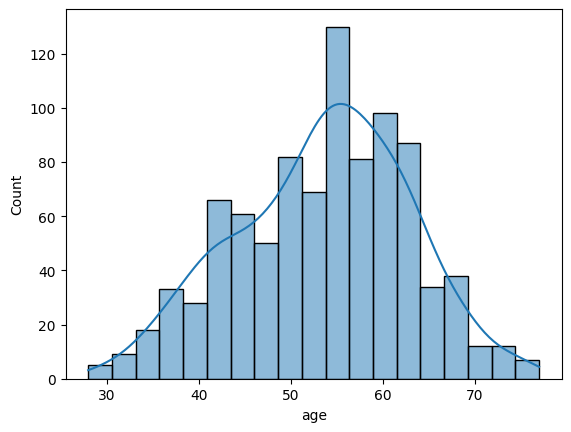

In [184]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


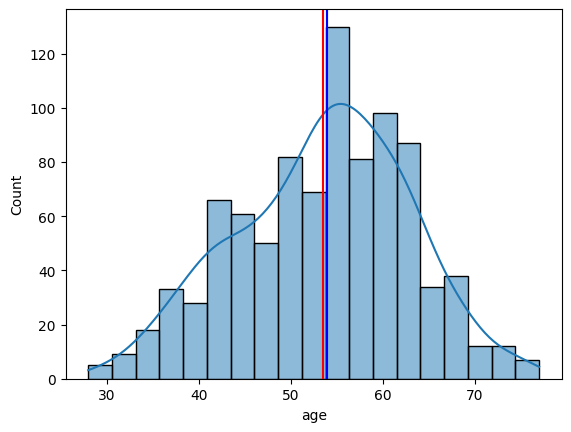

In [185]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's explore the gender based distribution of the dataset for age column.

In [186]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [187]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [188]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [249]:
# Plot Same Plot Using Plotly and Coloring this by sex
fig = px.pie(df, names='sex', color='sex')
fig.show()

- Our Data Contain 78.9% Of Mens and 21.1% Womens

In [189]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [190]:
# Lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [191]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [192]:
# plot the countplot of dataset column
# sns.countplot(data=df, x='dataset', hue = 'sex')

# better plots with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [193]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")


Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


#### Let's explore cp (Chest Pain) column: 

In [194]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [195]:
cp_num = pd.crosstab(df.cp,df.num)
cp_num

num,0,1,2,3,4
cp,,,,,
asymptomatic,104,197,89,83,23
atypical angina,150,19,2,3,0
non-anginal,131,37,14,18,4
typical angina,26,12,4,3,1


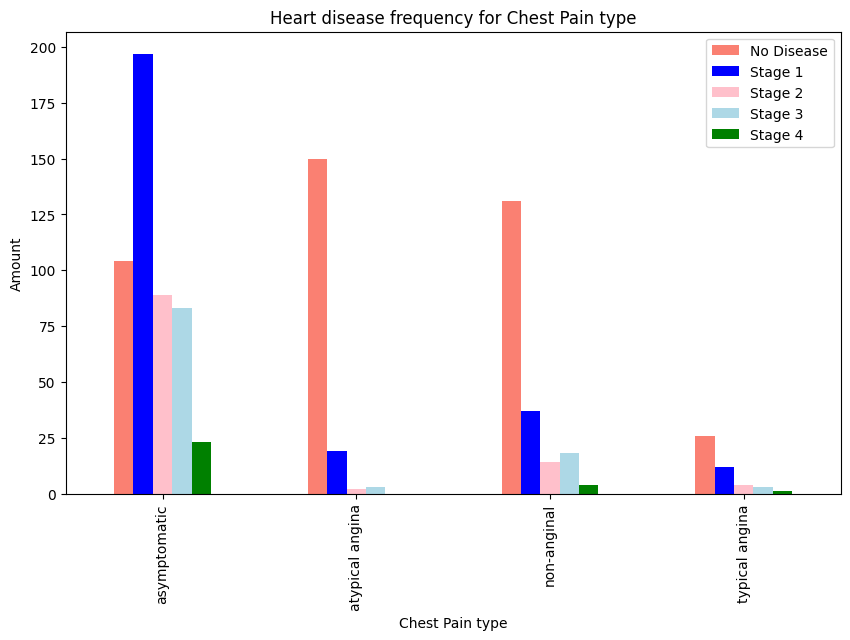

In [196]:
# Add Some Helpful info
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(10,6), 
                               color = ['salmon','blue','pink','lightblue','green'])
plt.title('Heart disease frequency for Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

In [197]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='cp', color='sex')
fig.show()

Types of Chest pain :

    1. **Asymptomatic:** No chest pain or discomfort.
    2. **Non-Anginal:** Chest pain not typical of heart-related issues; requires further investigation.
    3. **Atypical Angina:** Chest pain with characteristics different from typical heart-related chest pain.
    4. **Typical Angina:** Classic chest pain indicating potential insufficient blood supply to the heart.
Frome Above Results We Can Say That :
1. 426 Males have no Chest Pain While There are Only 70 Female Have No Chest.
2. 151 Male Have non-anginal chest pain While 53 Female Have non-anginal chest pain.
3. 113 Males Have Atypical chest pain while 61 Female Have atypical chest pain.
4. 36 Males Have Typical angina chest pain While only 10 Females Have Typical Angina Chest Pain .
5. People From Cleveland Have High Ratio of Asymptomatic mean There Most Of People have no ChestPain . People From Hungary Have Higher Ratio of AtypicalChestPain . 

<Axes: xlabel='cp', ylabel='count'>

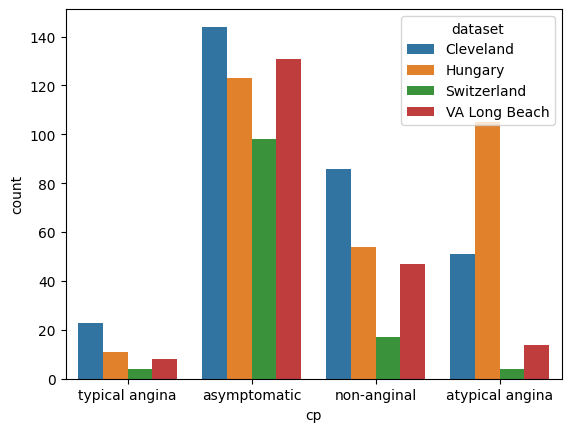

In [198]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [199]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [200]:
# draw the plot of cp column grouped by num column using plotly
fig = px.histogram(data_frame=df, x='cp', color='num')
fig.show()

#### Let'e explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

high blood pressure increasing the risk of heart disease and stroke, often asymptomatic, while low blood pressure can lead to dizziness and fainting

In [201]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

-  Resting Blood Prssure vs Disease

In [202]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=df[df['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

<Axes: xlabel='trestbps', ylabel='Count'>

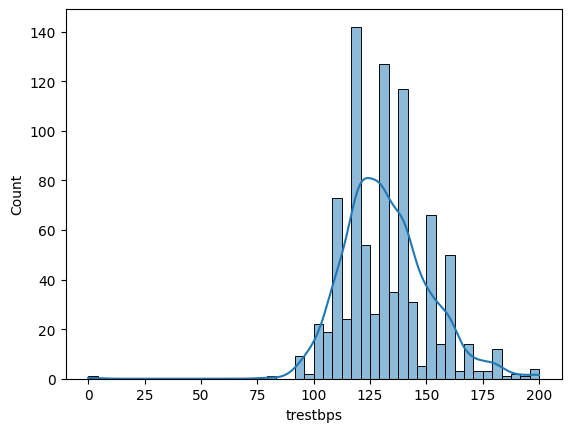

In [203]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [204]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Lets Explore the chol Column 
What is the chol :  a fatty substance essential for body function, but elevated levels can contribute to heart disease.

In [205]:
# First we Describe Chol
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [206]:
# Cross Tab of chol and num
cross = pd.crosstab(df['chol'], df['num']).describe()
cross

num,0,1,2,3,4
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.806452,1.188940,0.493088,0.488479,0.124424
std,2.015990,4.268345,3.152189,2.619568,0.507538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000
max,20.000000,62.000000,46.000000,38.000000,6.000000


<Axes: ylabel='chol'>

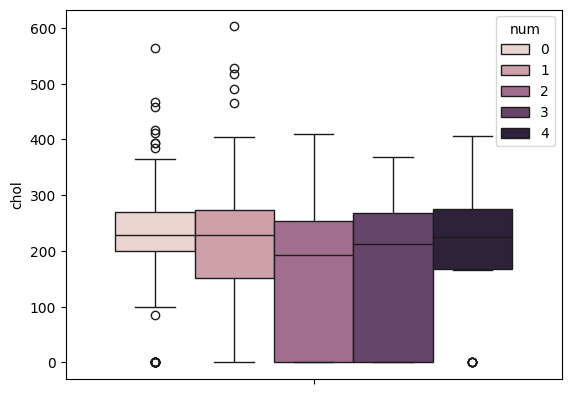

In [228]:
sns.boxplot(y=df['chol'], hue=df['num'])

In [208]:
# draw the plot of chol column grouped by num column using plotly
fig = go.Figure()
fig.add_trace(go.Violin(y=df['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=df[df['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=df[df['num'] == 4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5 )
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

#### Lets Explore Thal ( Thalesmia)
Normal: Within expected or healthy parameters.

Reversible Defect: An abnormality that can potentially be corrected or improved.

Fixed Defect: An abnormality that is unlikely to change or be corrected.

In [209]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [213]:
# Group by thal by sex
df.groupby('thal')['sex'].value_counts()

thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: count, dtype: int64

In [214]:
# Groupby Thal by Dataset
df.groupby('thal')['dataset'].value_counts()

thal               dataset      
fixed defect       Cleveland         18
                   Hungary           10
                   Switzerland       10
                   VA Long Beach      8
normal             Cleveland        166
                   Switzerland       19
                   Hungary            7
                   VA Long Beach      4
reversable defect  Cleveland        117
                   Switzerland       42
                   VA Long Beach     22
                   Hungary           11
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

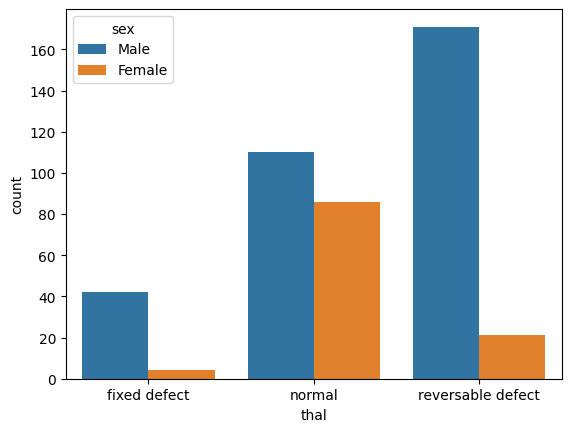

In [231]:
# count plot of cp column by dataset column
sns.countplot(df, x='thal', hue='sex')

In [227]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='age', color='thal')
fig.show()

In [232]:
# draw the plot of thal column grouped by age column using plotly
fig = px.histogram(data_frame=df, x='thal', color='dataset')
fig.show()

<Axes: xlabel='thal', ylabel='count'>

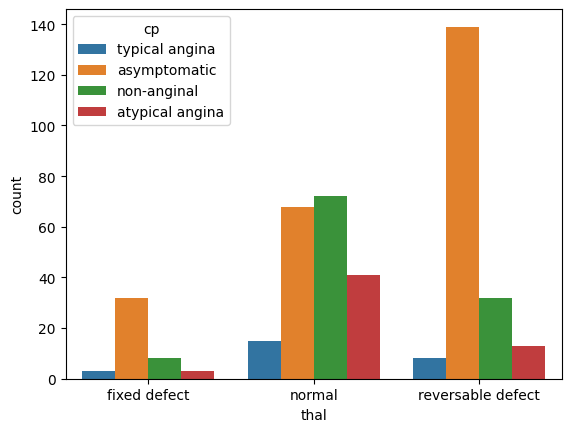

In [236]:
# Plot or groupby to check the people who have thal does the have cp 
df.groupby('thal')['cp'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='cp')

<Axes: xlabel='thal', ylabel='count'>

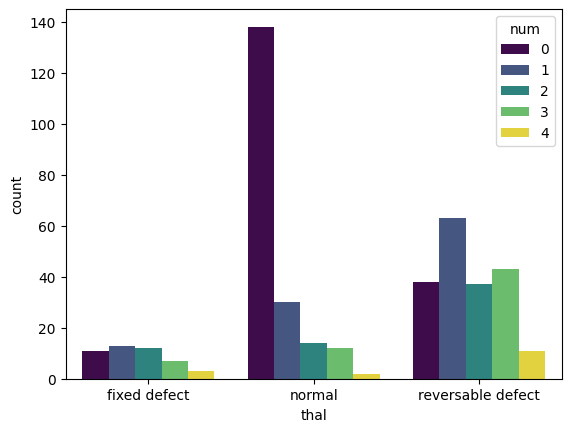

In [239]:
# Now Check People with Thal Survive or Not 
df.groupby('thal')['num'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='num' , palette='viridis')

#### Lets Deal With Num , The Target Variable 

In [240]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='count'>

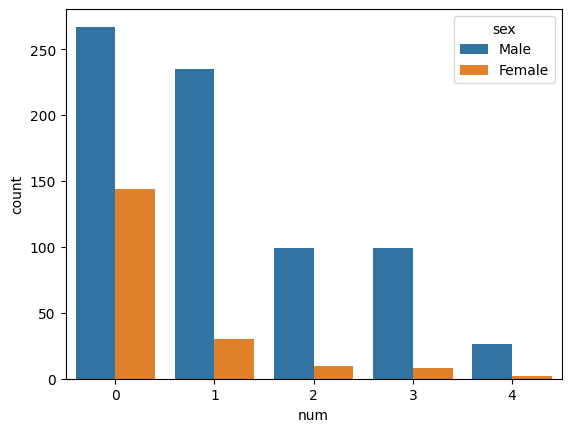

In [242]:
# Groupby num with sex 
df.groupby('num')['sex'].value_counts()
# Plot to Visualize
sns.countplot(df, x='num', hue='sex')

<Axes: xlabel='age', ylabel='Count'>

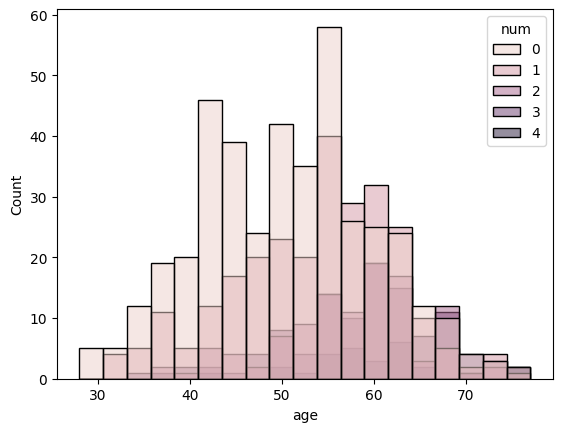

In [246]:
# groupby num by age 
df.groupby('num')['age'].value_counts()
# Plot to Visualize
sns.histplot(df, x='age', hue='num')

In [247]:
# Make Histplot using Plotly 
px.histogram(data_frame=df, x='age', color='num')

---

#### Outputs:
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
---
8. Observations :
   1. The Mean Age according to the dataset is : 
   
      Cleveland        54.351974
      
      Hungary          47.894198

      Switzerland      55.317073

      VA Long Beach    59.350000
      
   2. The Median Age according to the dataset is :
      
      Cleveland        55.5
      
      Hungary          49.0
      
      Switzerland      56.0
      
      VA Long Beach    60.0

   3. The Mode Age according to the dataset is :
      
      Cleveland              58
      
      Hungary                54
      
      Switzerland            61
      
      VA Long Beach    [62, 63]
 ---     
9.  Chest Pain Output :
    
   * `0 = no heart disease`
   * `1 = mild heart disease`
   * `2 = moderate heart disease `
   * `3 = severe heart disease`
   * `4 = critical heart disease `
      1. A total of 104 individuals are identified as having neither chest pain nor heart disease.

      2. Only 23 individuals are found to have no chest pain while experiencing critical heart disease.

      3. A group of 83 individuals is observed to be free from chest pain while having severe heart disease.

      4. In the dataset, 197 individuals are noted for having no chest pain and exhibiting mild heart disease.

      5. Among the individuals, 89 have no chest pain while presenting with moderate heart disease.
    Results According to Group by cp and Num : 
   [cp               num 

   asymptomatic     1      (197) | 0      (104) | 2       (89) | 3       (83) | 4       (23)

   atypical angina  0      (150) | 1       (19) | 3        (3) | 2        (2)

   non-anginal      0      (131) | 1       (37) | 3       (18) | 2       (14) | 4        (4)

   typical angina   0       (26) | 1       (12) | 2        (4) | 3        (3) | 4        (1)  ]

From Above out 0,1,2,3,4 Show Diseases Level adn Next Their Values 

---     

10. Missing Values Imputation :
    So Here we impute missing Values by using Iterative Imputer  and Random Forest . In this Dataset some Columns Have Higher Missing Values Ratio , so we have to Used Advance methods to impute missing Values . We Define a FUnction for Iputing Missing Values , In Which We Passed the Columns Names and The FUnction Return a Dataset With no Missing Values .

      Methods : 
      1. Random Forest Classifier 
      2. Random Forest Regressor
      3. Iterative Imputer 
--- 
11.  Outliers : 
    While Dealing with Outliers , from my Observations There is only One Outlier in the dataset which i removed . Other Values Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .
---
12.   Thal Output :
      - Normal: Within expected or healthy parameters.
      - Reversible Defect: An abnormality that can potentially be corrected or improved.
      - Fixed Defect: An abnormality that is unlikely to change or be corrected.
  
      1. Among the individuals, 110 males and 86 females are classified as normal.
      2. A total of 42 males and 4 females exhibit a fixed defect.
      3. In the dataset, 171 males and 21 females are identified with a reversible defect.
       The higher ratio of males compared to females is attributed to the dataset's male predominance.
      4. The incidence of fixed defects is higher in individuals from Cleveland, while VA Long Beach demonstrates a lower occurrence of fixed defects.
      5. Both individuals with thalassemia and those with normal thalassemia experience chest pain.
      6. Individuals with normal thalassemia often exhibit a higher ratio of being free from heart disease, although some may still experience heart-related conditions.
      7. Those with thalassemia generally have an increased likelihood of heart disease, yet some individuals with thalassemia do not develop such health issues.
---
13.  Num : 
    1. Men exhibit a higher ratio of being disease-free, while females show a lower ratio in the dataset.

    2. Conversely, based on the dataset, men are more affected by diseases compared to women.


<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

We are going to make a function to deal with missing values.

In [32]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [33]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [34]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

- Here i Define a Function for Imputing Null Value , In Which I Just Passed the Column name the Function Run and impute the Null Values in it. \n
  The Mthods used for Imputation are `Random Forest Classifier` , `Random Forest Regression` and `Iterative Imputer` 

In [35]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [36]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%


MAE = 13.254913294797687 

RMSE = 17.19254435803177 

R2 = 0.0770926509771227 

Missing Values chol : 3.26%
MAE = 44.6482584269663 

RMSE = 63.47107564283457 

R2 = 0.6808679939275598 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.602312138728326 

RMSE = 21.550599176252415 

R2 = 0.32468248692617296 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 81.5 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5583313953488371 

RMSE = 0.7859811044240363 

R2 = 0.4114516363327213 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 61.29 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [37]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- Here we are Done With Imputing Missing Values , By using Advance Methods Like Random Forest and Iterative Imputer . Which Are More Accurate then using Mean , Median or Mode  We Define a FUnction for Iputing Missing Values , In Which We Passed the Columns Names and The FUnction Return a Dataset With no Missing Values .

      MEthods : 
      1. Random Forest Classifier 
      2. Random Forest Regressor
      3. Iterative Imputer 

---

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>

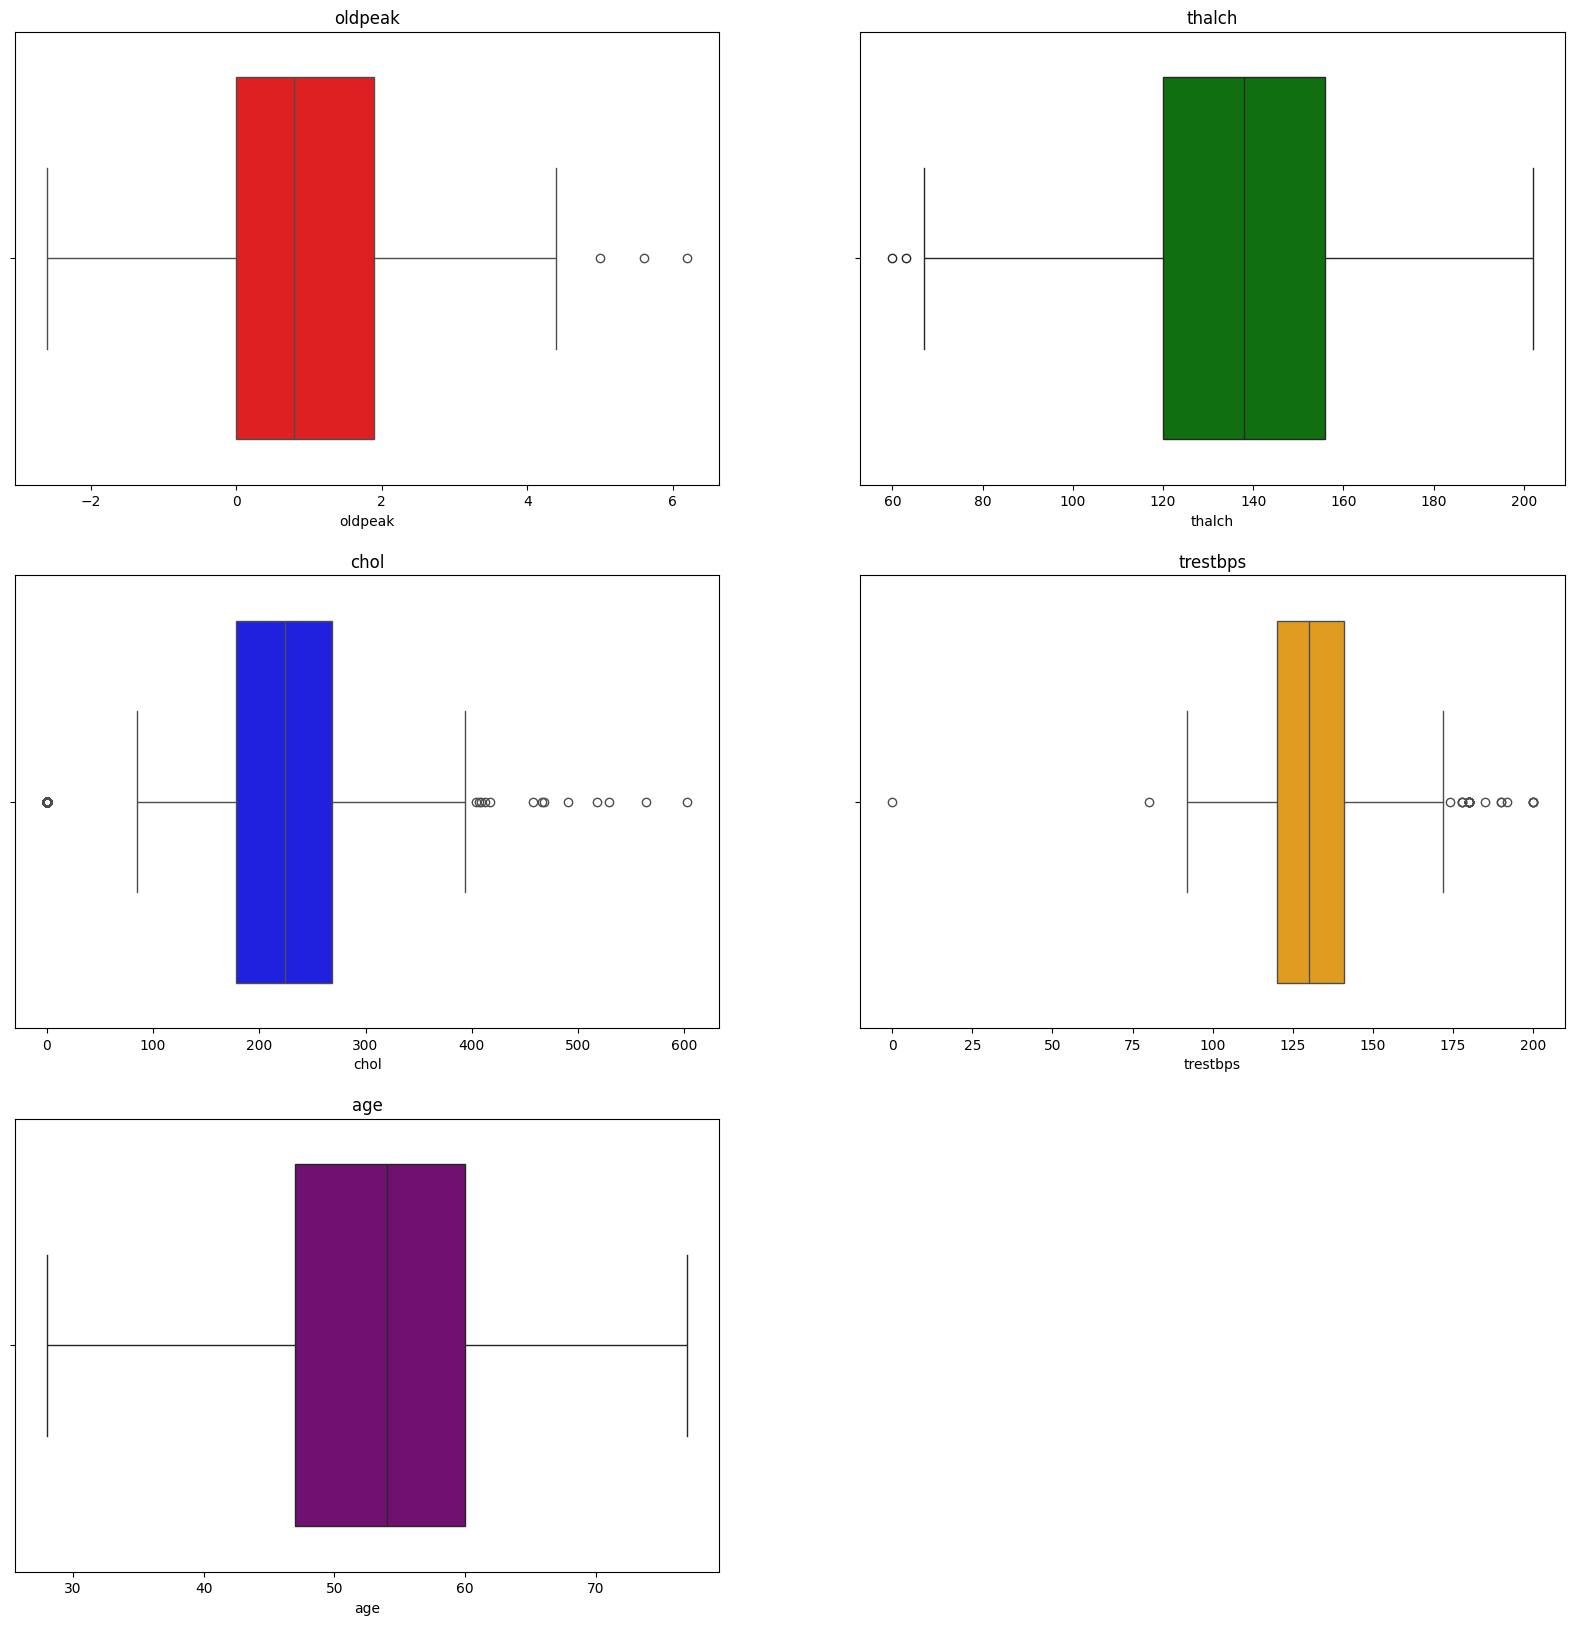

In [38]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [39]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [40]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [41]:
# Saving The Cleaned Data 
df.to_csv('heart_disease_cleaned.csv', index=False)

In [42]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


- While Dealing with Outliers , from my Observations There is only One Outlier in the dataset which i removed . Other Values Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .


---

<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning</span>

In [43]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

 The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
 The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [9]:
# Import Libraires 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Train test Split 
from sklearn.model_selection import train_test_split
# Models 
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
# Import Naive Bayes
#metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score
#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import QuantileTransformer , PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Remove Warning 
import warnings
warnings.filterwarnings('ignore')
# Saving Model 
import pickle

In [291]:
# Load Again The Clean Data 
df = pd.read_csv('heart_disease_cleaned.csv')

-- Train Test SPlit

In [292]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

-- Model Training and Evaluate Results

In [293]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for LogicRegression is  0.50
Accuracy_score for Naive Bayes is  0.57
Accuracy_score for KNeighborsClassifier is  0.58
Accuracy_score for SVC is  0.58
Accuracy_score for AdaBoostClassifier is  0.60
Accuracy_score for RandomForestClassifier is  0.66
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.67
Accuracy_score for DesicionTreeClassifier is  0.68


F1_Score for LogicRegression is  0.27
F1_Score for Naive Bayes is  0.38
F1_Score for KNeighborsClassifier is  0.27
F1_Score for SVC is  0.26
F1_Score for AdaBoostClassifier is  0.39
F1_Score for RandomForestClassifier is  0.40
F1_Score for GradientBoostingClassifier is  0.43
F1_Score for XGBClassifier is  0.49
F1_Score for DesicionTreeClassifier is  0.45


Precision for LogicRegression is  0.27
Precision for Naive Bayes is  0.38
Precision for KNeighborsClassifier is  0.29
Precision for SVC is  0.23
Precision for AdaBoostClassifier is  0.38
Precision for RandomForestClassifier is  

- Printing Best Model Based On Evalaution Matrices . With Best Parameters

In [47]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for LogicRegression is {}
Best Parameters for Naive Bayes is {}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 43}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 10}
Best Parameters for RandomForestClassifier is {'max_depth': None, 'n_estimators': 100, 'random_state': 42}


Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.48
Best Parameters: {'n_estimators': 100, 'random_state': 42}
Best model based on Precision is GradientBoostingClassifier with Precision of 0.49
Best Par

 - Accordingy to the my Notebook , the best model based on Accuracy is  GradientBoostingClassifier with Accuracy of 0.70. With Best Parameters {'random_state': 42, 'n_estimators': 100}.
 - Accordingy to the my Notebook , the best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.51.
 - Accordingy to the my Notebook , the best model based on Precision is GradientBoostingClassifier with Precision of 0.53

---

#### Now I Used Different Methods to Improve Accuracy of the Models . By doing feature selection , Scaling the data , Normalizing the data. 

- Here we Load the Data Again an Now we will  try to Improve Accuracy 

 Steps : 
1. Normalize 
2. PCA
3. Scaling 
4. Discritization
5. Feature selection
6. Feature Extraction

In [48]:
# Here we Again Load the Data 
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


- Plotting the Data to check the Distribution of the Numeric Features

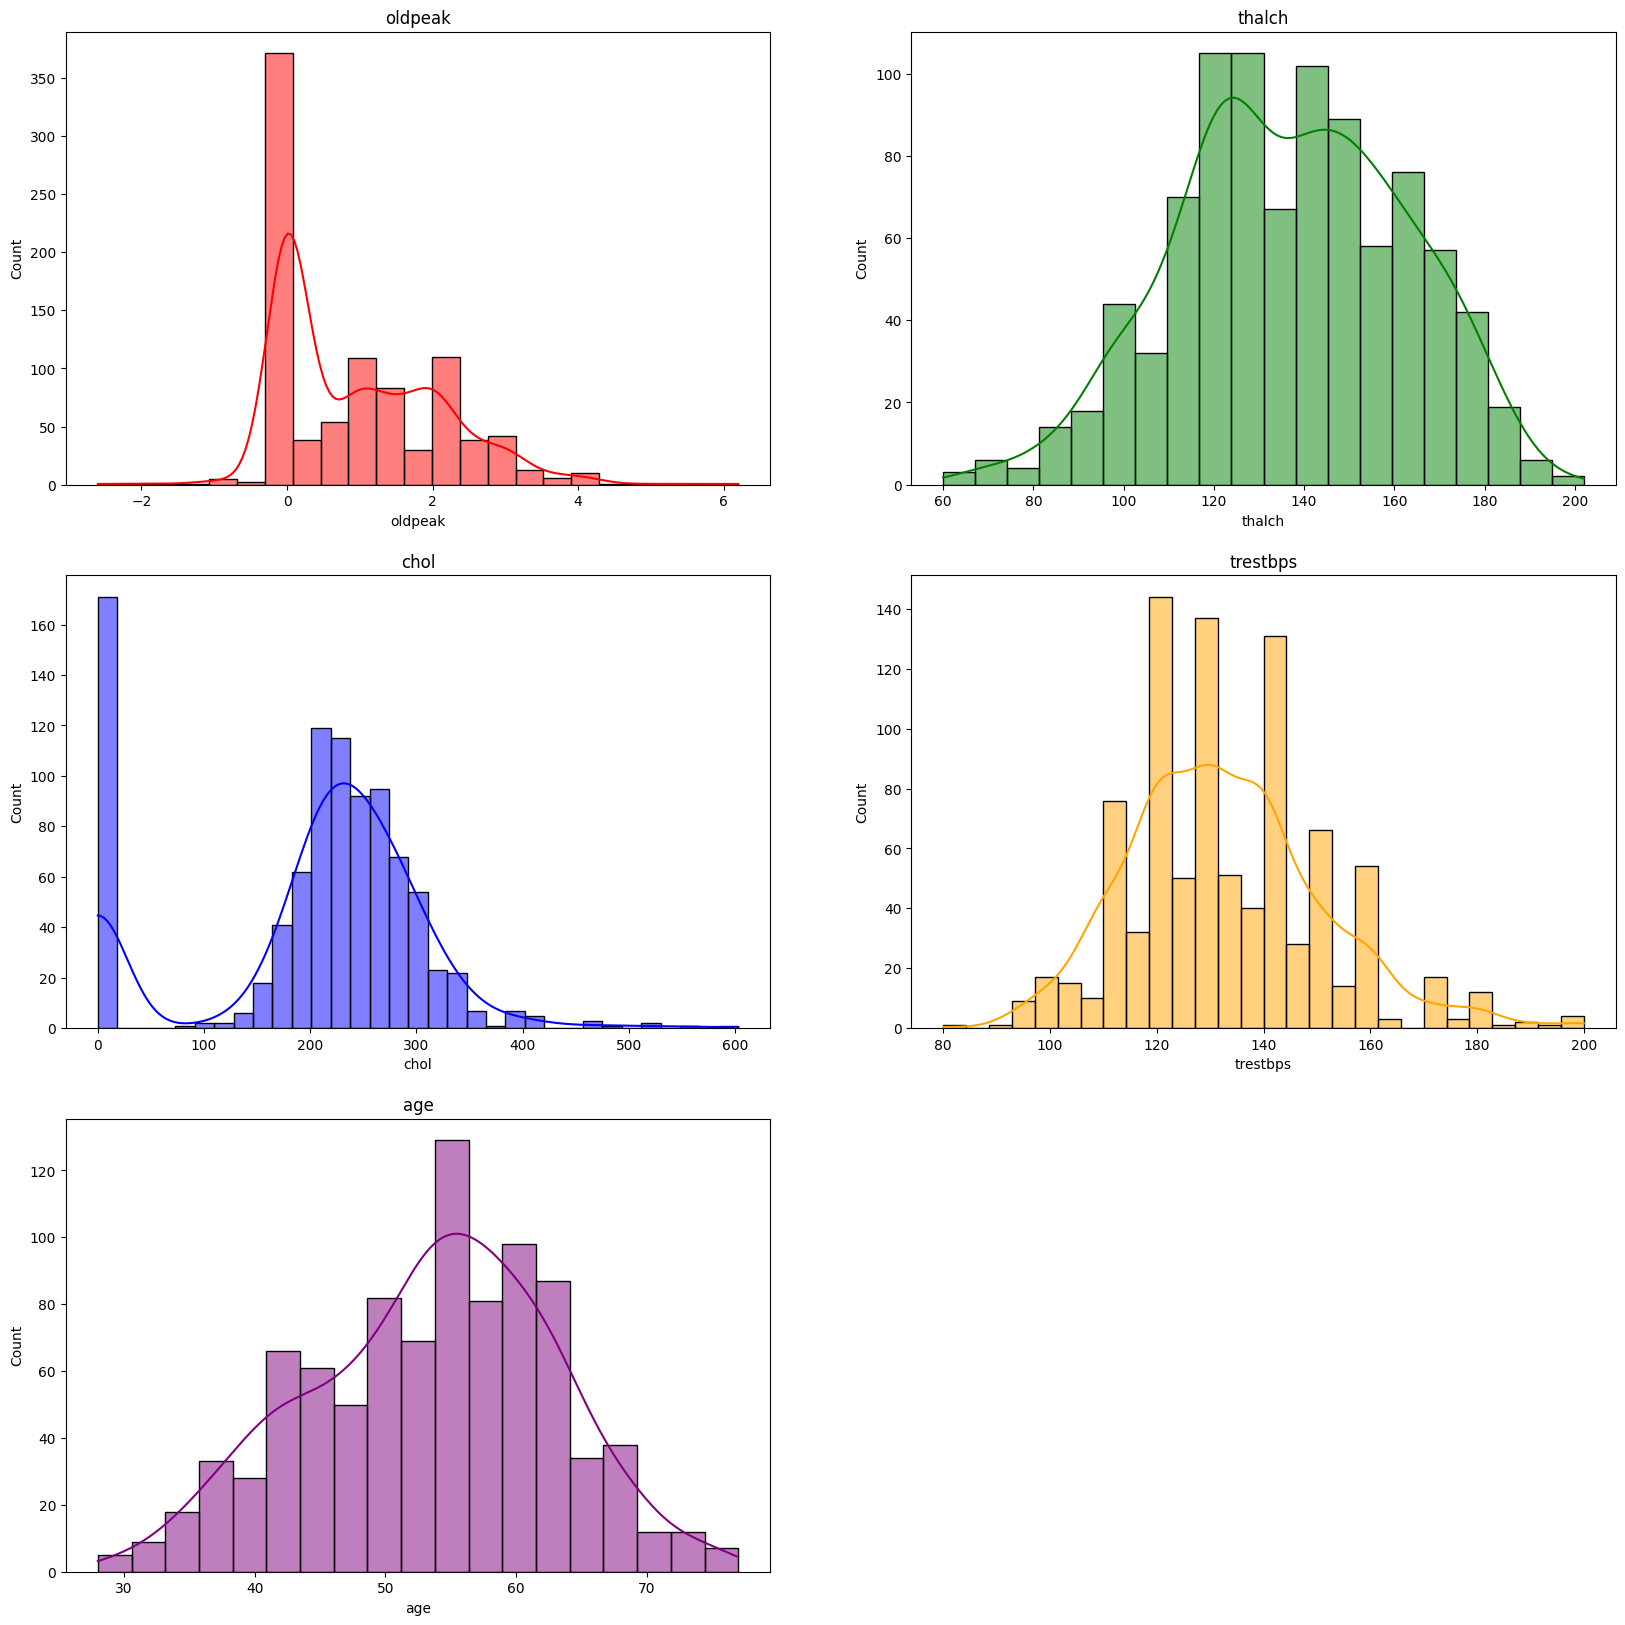

In [49]:
# create hist plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df[col], color=colors[i], kde=True)
    plt.title(col)
plt.show()

From Vizualization , I Can see that the `age` , `chol` ,`trestbps ` and `thalch` Are Near to Normaly distributed . But Now we have to Perform test to Check Wether the Columns Are `Gaussian` Like or Not.

- Here First we Import Important Libraries for Testing Data.

In [50]:
# Import Libraries Important for testing Data
from scipy.stats import shapiro

In [51]:
# Now Perform Shapiro Wilk Test for all numeric columns
for col in numeric_cols:
    stat, p = shapiro(df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.871, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.862, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.991, p=0.000
Sample does not look Gaussian (reject H0)


From the Above test Result we can Say That , The Data is Not Normally distributed . Now We Have to Normalize The Data 

---

#### Step 1 : Normalize the Data
And Make a Copy of Data So We can test Each Method and FInd Best One 

In [52]:
# Making a new Dataset 
df_pt = df.copy()

In [53]:
# Just to Check the Data doesnot Contain Null Values
df_pt.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [54]:
# Here i Make a New Variable Name Numeric_pt So The Code Will not Get Confused
numeric_pt = numeric_cols

In [55]:
#Power Transformation On Numeric Columns of df_pt
pt = PowerTransformer()
# Using Loop To Apply Power Transformation
for col in numeric_pt:
    df_pt[col] = pt.fit_transform(df_pt[[col]])

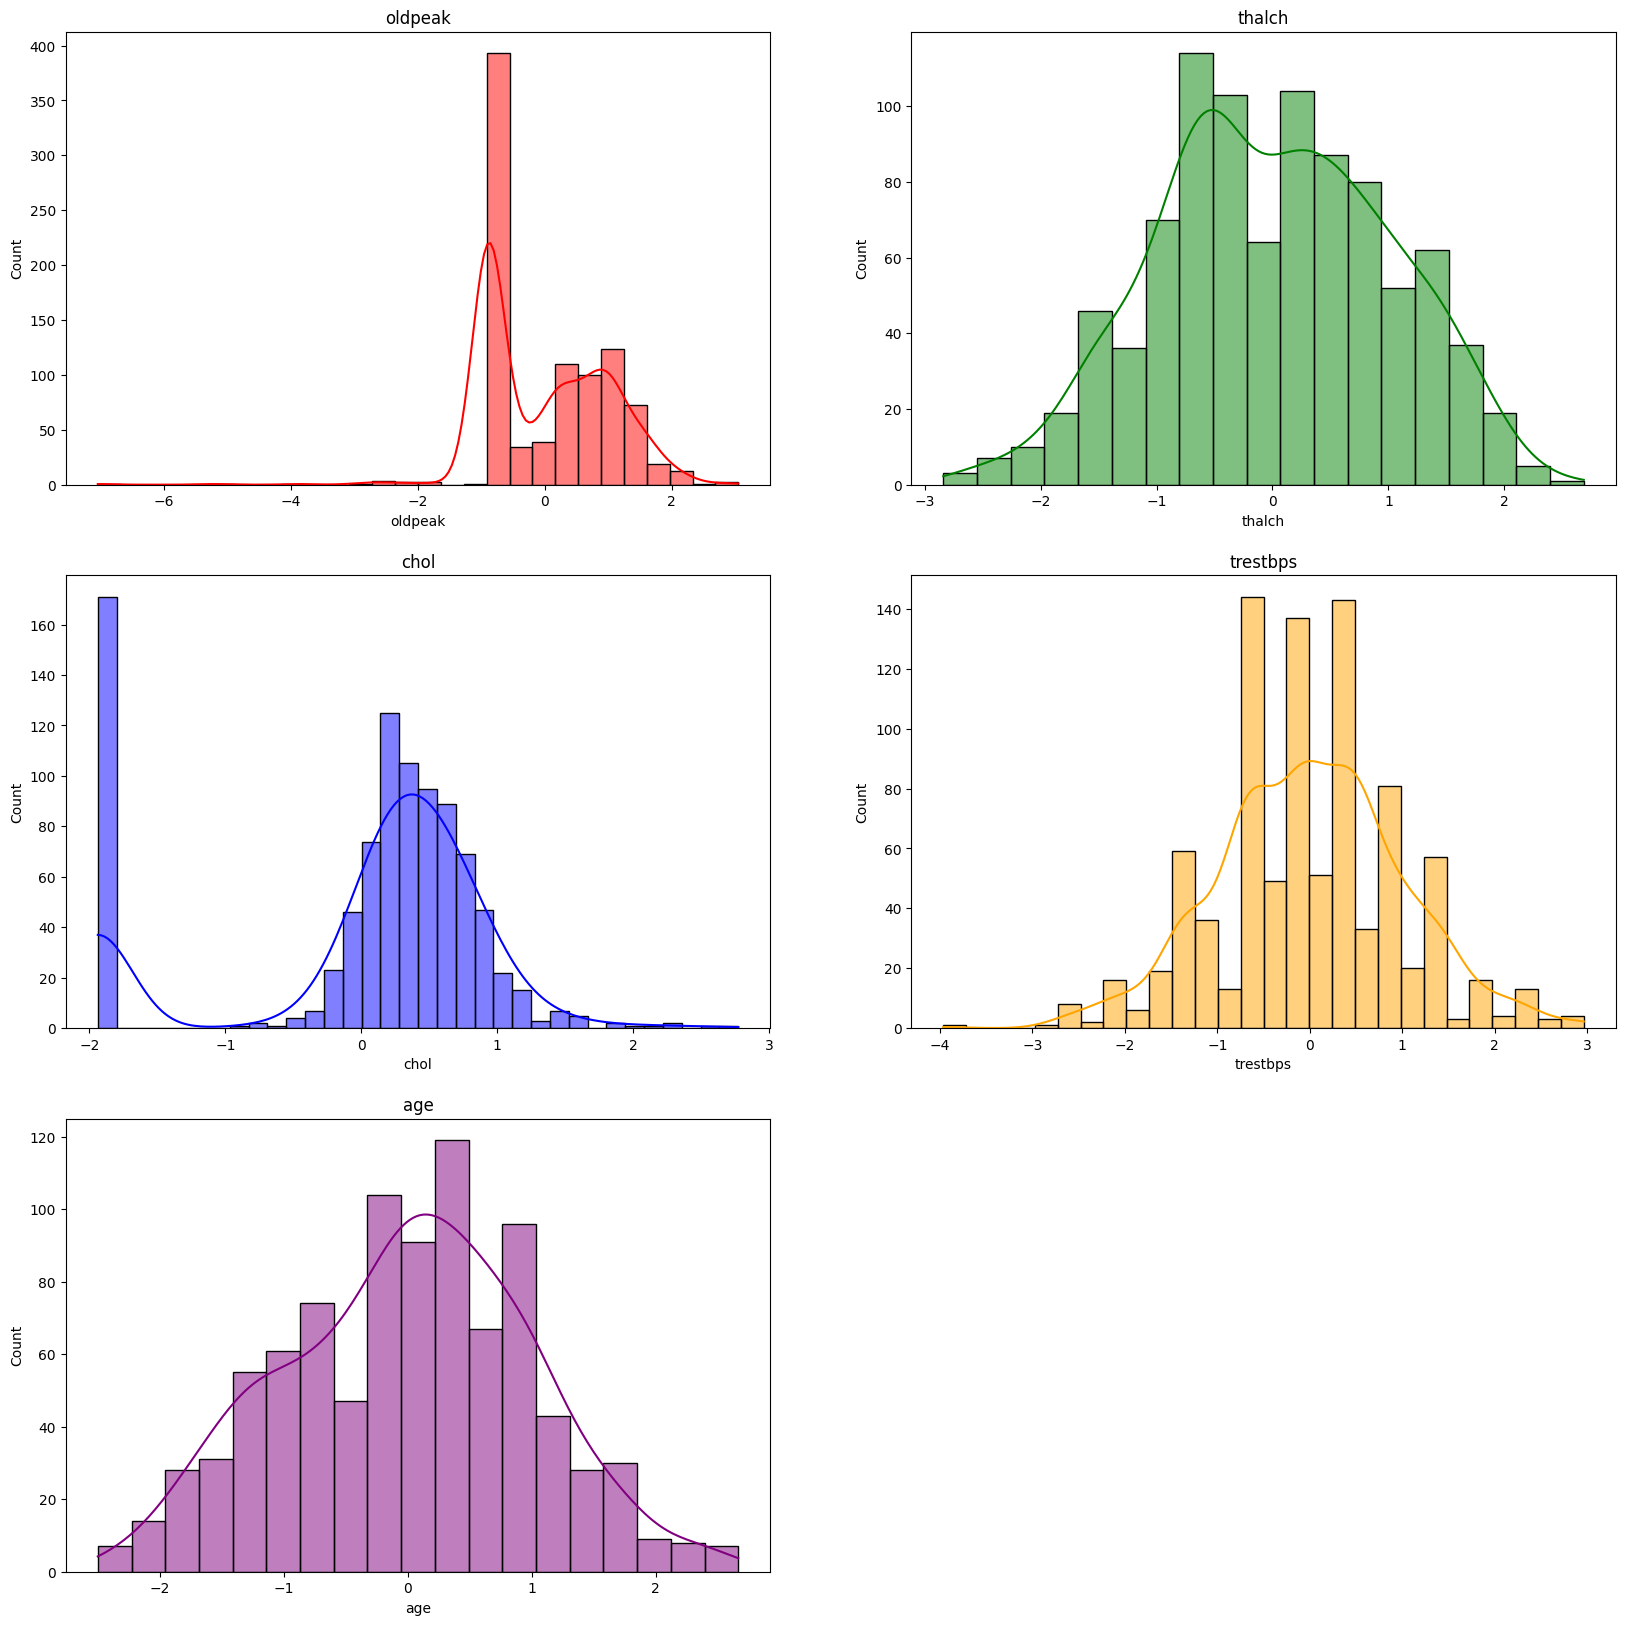

In [56]:
# First We Visualize By Plotting Then We Apply ShapiroWilk Test 
# create hist plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_pt):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df_pt[col], color=colors[i], kde=True)
    plt.title(col)
plt.show()

- According to My Notebook and Output , i Can say that the All The Columns Remain Same After PowerTransformation , except `oldpeak`. Infact, 
  PowerTransformation Method effect the `oldpeak` column Distribution

In [57]:
# Now we Check Again The Data is Normalize or Not using Shapiro Wilk Test
for col in numeric_pt:
    stat, p = shapiro(df_pt[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.799, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.990, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


After PowerTransformation , the data is still non-Gaussian. Lets train Model and Check Accuracy .

In [58]:
# split the data into X and y
X = df_pt.drop('num', axis=1)
y = df_pt['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass



# split the data into train and test
X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train_pt, y_train_pt)
    
    # make prediction from each model
    y_pred_pt = pipeline.predict(X_test_pt)
    # Metric
    accuracy = accuracy_score(y_test_pt, y_pred_pt)
    f1 = f1_score(y_test_pt, y_pred_pt,average='macro')
    precision = precision_score(y_test_pt, y_pred_pt,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for Naive Bayes is  0.57
Accuracy_score for SVC is  0.59
Accuracy_score for KNeighborsClassifier is  0.60
Accuracy_score for LogicRegression is  0.61
Accuracy_score for AdaBoostClassifier is  0.65
Accuracy_score for DesicionTreeClassifier is  0.66
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.67
Accuracy_score for RandomForestClassifier is  0.69


F1_Score for Naive Bayes is  0.40
F1_Score for SVC is  0.27
F1_Score for KNeighborsClassifier is  0.27
F1_Score for LogicRegression is  0.40
F1_Score for AdaBoostClassifier is  0.45
F1_Score for DesicionTreeClassifier is  0.42
F1_Score for GradientBoostingClassifier is  0.49
F1_Score for XGBClassifier is  0.47
F1_Score for RandomForestClassifier is  0.45


Precision for Naive Bayes is  0.40
Precision for SVC is  0.23
Precision for KNeighborsClassifier is  0.24
Precision for LogicRegression is  0.40
Precision for AdaBoostClassifier is  0.45
Precision for DesicionTreeClassifier is  

In [60]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for Naive Bayes is {}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 97}
Best Parameters for LogicRegression is {}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 10}
Best Parameters for RandomForestClassifier is {'max_depth': None, 'n_estimators': 100, 'random_state': 42}


Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.49
Best Parameters: {'n_estimators': 100, 'random_state': 42}
Best model based on Precision is GradientBoostingClassifier with Precision of 0.51
Best Par

After powertransformation , we can see that the model perform Well and  the accuracy Improved , in this case 
1. Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69

   Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
1. Best model based on F1_Score is XGBClassifier with F1_Score of 0.51
  
   Best Parameters: {'n_estimators': 10}
1. Best model based on Precision is XGBClassifier with Precision of 0.52
   
   Best Parameters: {'n_estimators': 10}

From the above Output we can see that Our Accuracy is improved , also our Best model According to this Output is RandomForestClassifier with 0.69 Accuracy . Which is not Bad but We Have to Improve Our Accuracy.

---

 1.1 Now we Use Quantile Transformations and See if Our Model Looks like Gausian . 

First of all again we make a new dataset , so that our code will not look like Confused .

In [61]:
# Make a new dataset 
df_qt = df.copy()

In [62]:
# Here i Make a New Variable Name Numeric_qt So The Code Will not Get Confused
numeric_qt = numeric_cols
numeric_qt

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [63]:
#Power Transformation On Numeric Columns of df_pt
qt = QuantileTransformer(output_distribution='normal', random_state=42)
# Using Loop To Apply Power Transformation
for col in numeric_qt:
    df_qt[col] = qt.fit_transform(df_qt[[col]])

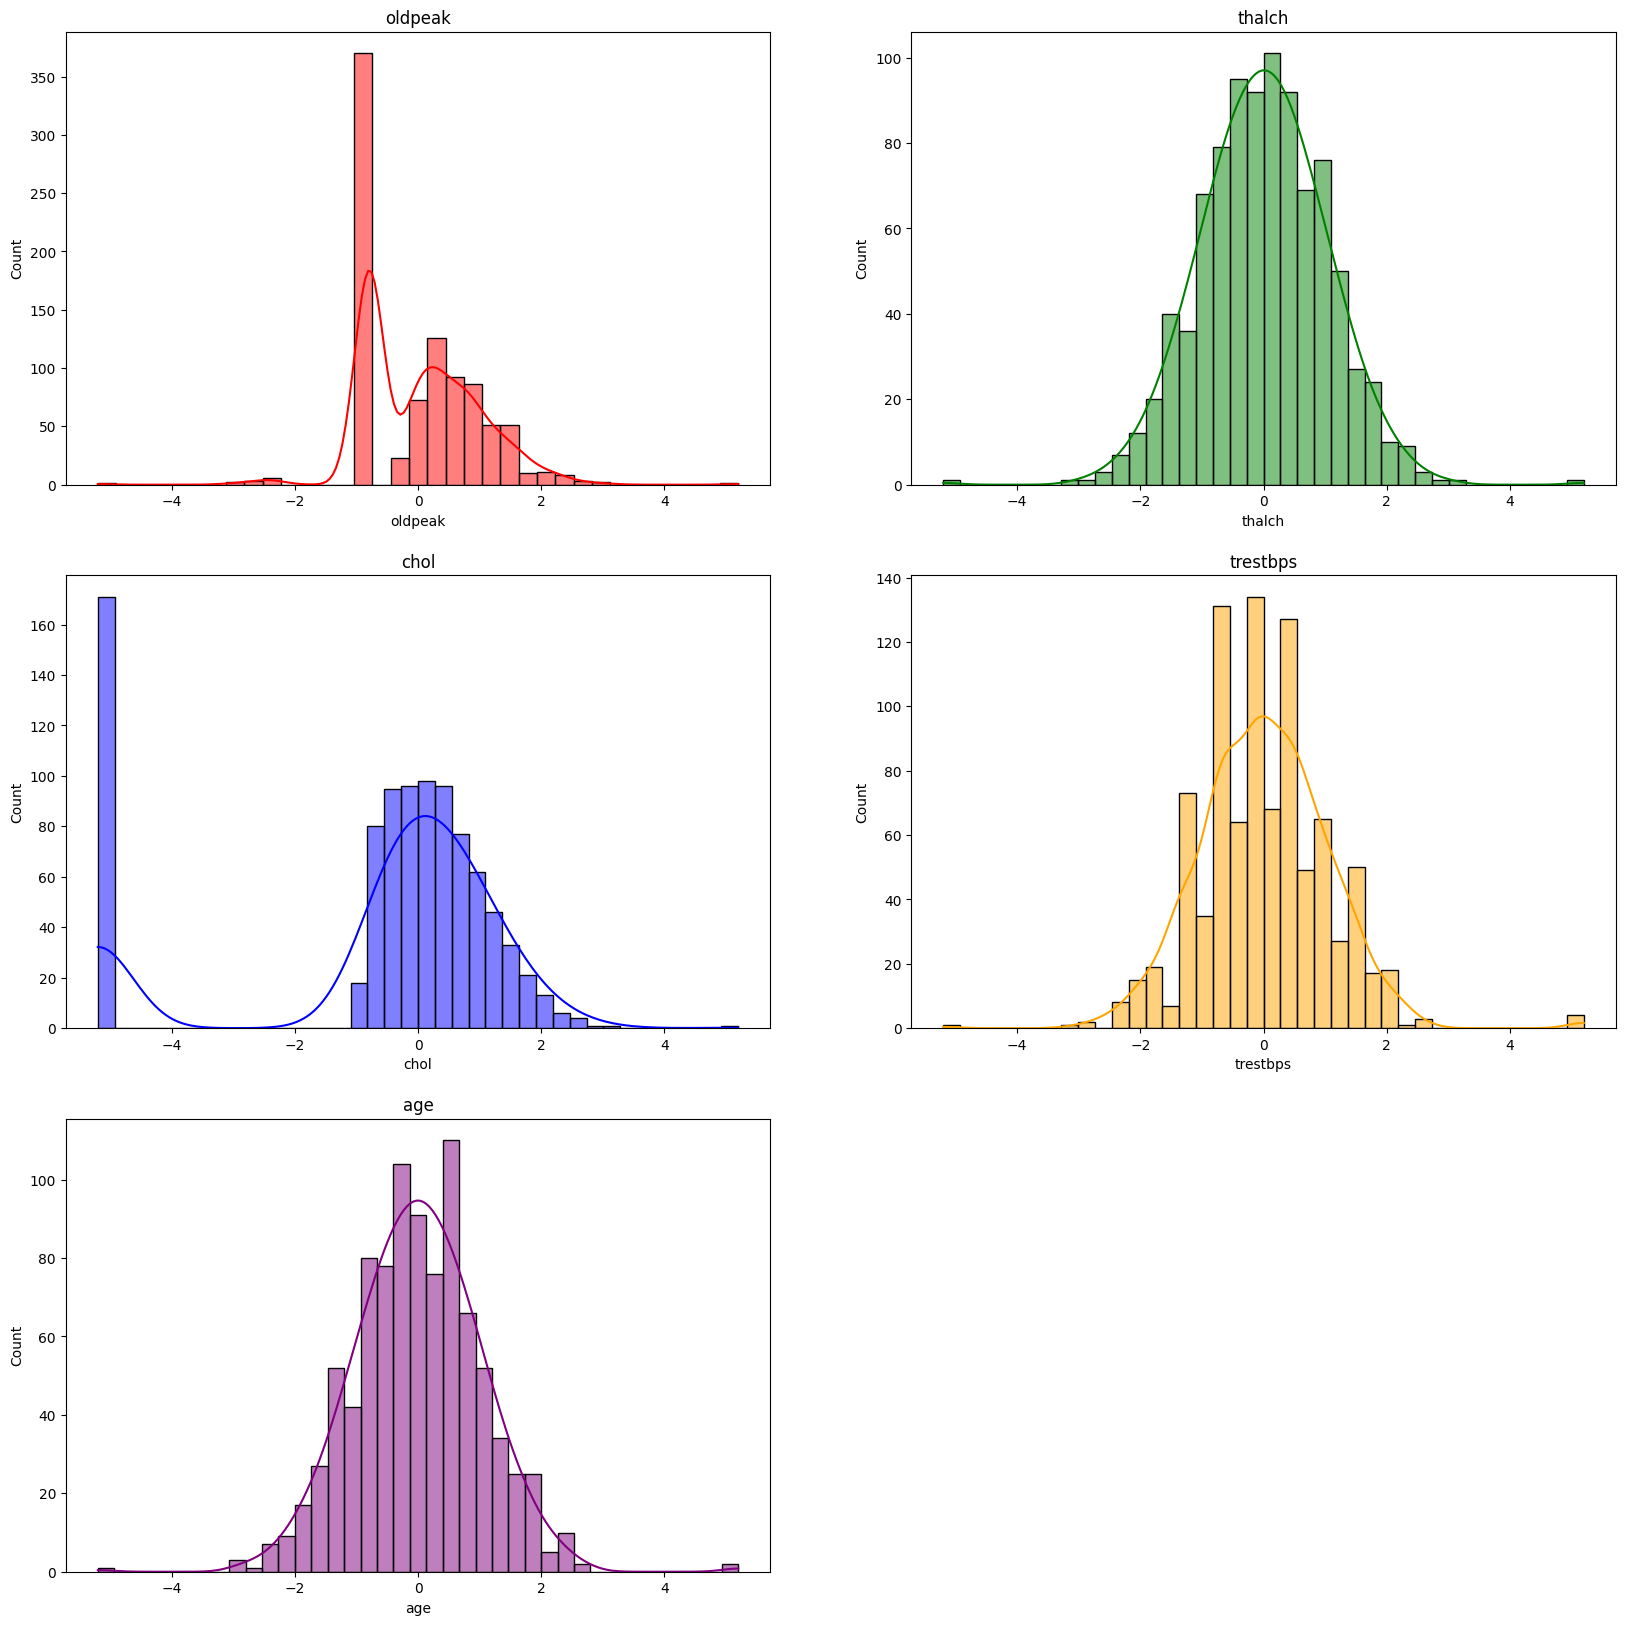

In [64]:
# First We Visualize The Data 
# First We Visualize By Plotting Then We Apply ShapiroWilk Test 
# create hist plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_qt):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df_qt[col], color=colors[i], kde=True)
    plt.title(col)
plt.show()

From Above Visualization outputs , i can say that `age` , `trestbps` and `thalch` looks Like Gaussian . But Now we have to Perform Normalizty Test. to check Whethere the Data is Normal or not .
- After Quantile transformation , `oldpeak` remain same , but Quantile method effect the distribution of `chol` . From My Output this is the result 

In [65]:
# Now we Check Again The Data is Normalize or Not using Shapiro Wilk Test
for col in numeric_qt:
    stat, p = shapiro(df_qt[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.894, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.760, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.971, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.988, p=0.000
Sample does not look Gaussian (reject H0)


- Here the ShapiroWilk test says that the distribution is Still Non Gaussian . Ok first we Train Model and Check Results . Does Improvement Seems to be in Results or not .

In [66]:
# split the data into X and y
X = df_qt.drop('num', axis=1)
y = df_qt['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass



# split the data into train and test
X_train_qt, X_test_qt, y_train_qt, y_test_qt = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train_qt, y_train_qt)
    
    # make prediction from each model
    y_pred_qt = pipeline.predict(X_test_qt)
    # Metric
    accuracy = accuracy_score(y_test_qt, y_pred_qt)
    f1 = f1_score(y_test_qt, y_pred_qt,average='macro')
    precision = precision_score(y_test_qt, y_pred_qt,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for Naive Bayes is  0.57
Accuracy_score for SVC is  0.59
Accuracy_score for LogicRegression is  0.60
Accuracy_score for KNeighborsClassifier is  0.60
Accuracy_score for AdaBoostClassifier is  0.64
Accuracy_score for DesicionTreeClassifier is  0.66
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.67
Accuracy_score for RandomForestClassifier is  0.69


F1_Score for Naive Bayes is  0.40
F1_Score for SVC is  0.27
F1_Score for LogicRegression is  0.39
F1_Score for KNeighborsClassifier is  0.27
F1_Score for AdaBoostClassifier is  0.44
F1_Score for DesicionTreeClassifier is  0.42
F1_Score for GradientBoostingClassifier is  0.50
F1_Score for XGBClassifier is  0.47
F1_Score for RandomForestClassifier is  0.46


Precision for Naive Bayes is  0.40
Precision for SVC is  0.23
Precision for LogicRegression is  0.39
Precision for KNeighborsClassifier is  0.24
Precision for AdaBoostClassifier is  0.45
Precision for DesicionTreeClassifier is  

In [68]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for Naive Bayes is {}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for LogicRegression is {}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 97}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 10}
Best Parameters for RandomForestClassifier is {'max_depth': None, 'n_estimators': 100, 'random_state': 42}


Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.50
Best Parameters: {'n_estimators': 100, 'random_state': 42}
Best model based on Precision is GradientBoostingClassifier with Precision of 0.51
Best Par

After powertransformation , we can see that the model perform Well and  the accuracy remain same  , in this case 
1. Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69

   Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
1. Best model based on F1_Score is XGBClassifier with F1_Score of 0.49
  
   Best Parameters: {'n_estimators': 10}
1. Best model based on Precision is XGBClassifier with Precision of 0.50
   
   Best Parameters: {'n_estimators': 10}

From the above Output we can see that Our Accuracy is improved , also our Best model According to this Output is RandomForestClassifier with 0.69 Accuracy . Which is not Bad but We Have to Improve Our Accuracy.

Here We Can Say that Our Accuracy Is Improved By Using Normazlizing Methods . Which is not Bad but We Have to Improve Our Accuracy

---

#### 2. Lets Apply PCA . 
Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. 
Our Transormed Data Performed Well Soo We Apply Pca on Transformed Data First and Calculate Accuracy . 

In [69]:
df_qt.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.025747,Male,Cleveland,typical angina,0.805590,0.141089,True,lv hypertrophy,0.453308,False,1.138523,downsloping,0.0,fixed defect,0
1,2,1.498563,Male,Cleveland,asymptomatic,1.446104,0.971791,False,lv hypertrophy,-1.156989,True,0.474594,flat,3.0,normal,2
2,3,1.498563,Male,Cleveland,asymptomatic,-0.688266,0.073791,False,lv hypertrophy,-0.258143,True,1.341560,flat,2.0,reversable defect,1
3,4,-1.681878,Male,Cleveland,non-anginal,-0.075160,0.405398,False,normal,2.377526,False,2.007821,downsloping,0.0,normal,0
4,5,-1.206386,Female,Cleveland,atypical angina,-0.075160,-0.378858,False,lv hypertrophy,1.351702,False,0.380326,upsloping,0.0,normal,0


In [70]:
# split the data into X and y
X = df_qt.drop('num', axis=1)
y = df_qt['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# Applying PCA 
# Import PCA
from sklearn.decomposition import PCA
# Apply 
pca = PCA(n_components=10) # set the number of components
X_pca = pca.fit_transform(X)

# split the data into train and test
X_train_qt, X_test_qt, y_train_qt, y_test_qt = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [71]:
# Explained_Variance_Ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.99984071, 0.99990348, 0.99992965, 0.99994441, 0.99995607,
       0.99996666, 0.99997479, 0.99998055, 0.99998555, 0.99998989])

In [72]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train_qt, y_train_qt)
    
    # make prediction from each model
    y_pred_qt = pipeline.predict(X_test_qt)
    # Metric
    accuracy = accuracy_score(y_test_qt, y_pred_qt)
    f1 = f1_score(y_test_qt, y_pred_qt,average='macro')
    precision = precision_score(y_test_qt, y_pred_qt,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for LogicRegression is  0.57
Accuracy_score for KNeighborsClassifier is  0.60
Accuracy_score for SVC is  0.60
Accuracy_score for AdaBoostClassifier is  0.61
Accuracy_score for Naive Bayes is  0.62
Accuracy_score for XGBClassifier is  0.64
Accuracy_score for DesicionTreeClassifier is  0.65
Accuracy_score for GradientBoostingClassifier is  0.66
Accuracy_score for RandomForestClassifier is  0.68


F1_Score for LogicRegression is  0.37
F1_Score for KNeighborsClassifier is  0.27
F1_Score for SVC is  0.27
F1_Score for AdaBoostClassifier is  0.39
F1_Score for Naive Bayes is  0.42
F1_Score for XGBClassifier is  0.46
F1_Score for DesicionTreeClassifier is  0.41
F1_Score for GradientBoostingClassifier is  0.43
F1_Score for RandomForestClassifier is  0.45


Precision for LogicRegression is  0.37
Precision for KNeighborsClassifier is  0.24
Precision for SVC is  0.24
Precision for AdaBoostClassifier is  0.39
Precision for Naive Bayes is  0.43
Precision for XGBClassifier is  0.46
Prec

In [73]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for LogicRegression is {}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 97}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for Naive Bayes is {}
Best Parameters for XGBClassifier is {'n_estimators': 100}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for RandomForestClassifier is {'max_depth': None, 'n_estimators': 100, 'random_state': 42}


Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.68
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best model based on F1_Score is XGBClassifier with F1_Score of 0.46
Best Parameters: {'n_estimators': 100}
Best model based on Precision is XGBClassifier with Precision of 0.46
Best Parameters: {'n_estimators': 100}


From the Above Out When We Apply PCA Method , The Accuracy Still Same , There is No Improvement in Accuracy . Although by using PCA Method , The number of input features is shrink to 10 . In Above Code we Just Select Important 10 Feature From the Dataset Using PCA Method and Train Different Models . 
Results : 
1. Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.68

Best Parameters: {'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
1. Best model based on F1_Score is AdaBoostClassifier with F1_Score of 0.45
 
Best Parameters: {'n_estimators': 10, 'random_state': 42}
1. Best model based on Precision is AdaBoostClassifier with Precision of 0.59

Best Parameters: {'n_estimators': 10, 'random_state': 42}


2.1 Lets Apply PCA Again But This Time We Use First Data Set Without Applying Normalizing Methods . 

- Here i Just Go through with One Cell With Same Steps Above Just Applying PCA Method

In [74]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass
# Applying PCA 
# Import PCA
from sklearn.decomposition import PCA
# Apply 
pca = PCA(n_components=10) # set the number of components
X_pca1 = pca.fit_transform(X)


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca1, y, test_size=0.3, random_state=42)

# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for LogicRegression is  0.57
Accuracy_score for AdaBoostClassifier is  0.57
Accuracy_score for SVC is  0.61
Accuracy_score for KNeighborsClassifier is  0.61
Accuracy_score for Naive Bayes is  0.62
Accuracy_score for DesicionTreeClassifier is  0.62
Accuracy_score for GradientBoostingClassifier is  0.66
Accuracy_score for RandomForestClassifier is  0.68
Accuracy_score for XGBClassifier is  0.69


F1_Score for LogicRegression is  0.35
F1_Score for AdaBoostClassifier is  0.35
F1_Score for SVC is  0.28
F1_Score for KNeighborsClassifier is  0.34
F1_Score for Naive Bayes is  0.46
F1_Score for DesicionTreeClassifier is  0.39
F1_Score for GradientBoostingClassifier is  0.44
F1_Score for RandomForestClassifier is  0.45
F1_Score for XGBClassifier is  0.47


Precision for LogicRegression is  0.35
Precision for AdaBoostClassifier is  0.37
Precision for SVC is  0.24
Precision for KNeighborsClassifier is  0.41
Precision for Naive Bayes is  0.48
Precision for DesicionTreeClassifier is  

In [75]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for LogicRegression is {}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 43}
Best Parameters for Naive Bayes is {}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for RandomForestClassifier is {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 100}


Best model based on Accuracy is XGBClassifier with Accuracy of 0.69
Best Parameters: {'n_estimators': 100}
Best model based on F1_Score is XGBClassifier with F1_Score of 0.47
Best Parameters: {'n_estimators': 100}
Best model based on Precision is Naive Bayes with Precision of 0.48
Best Parameters: {}


Results : 
1. Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.67

Best Parameters: {'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
1. Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.45

Best Parameters: {'n_estimators': 100, 'random_state': 42}
1. Best model based on Precision is GradientBoostingClassifier with Precision of 0.45
   
Best Parameters: {'n_estimators': 100, 'random_state': 42}


---

#### 3 Try Scaling Methods 
1. Standard Scaling
2. Min Max Scaling
   Hope this Will Help to Improve Accuracy of data . I Will Doing Same Steps to This TIme COde Will be in Cell

- Standard Scaling

In [76]:
df_standard = df.copy()

In [77]:
numeric_s = numeric_cols

In [78]:
# split the data into X and y
X = df_standard.drop('num', axis=1)
y = df_standard['num']

# Apply Standard Scaling Using Loop On Numeric Features
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
for col in numeric_s:
    X[col] = sd.fit_transform(X[[col]])
# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for Naive Bayes is  0.57
Accuracy_score for SVC is  0.59
Accuracy_score for KNeighborsClassifier is  0.60
Accuracy_score for LogicRegression is  0.60
Accuracy_score for AdaBoostClassifier is  0.65
Accuracy_score for DesicionTreeClassifier is  0.66
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.67
Accuracy_score for RandomForestClassifier is  0.70


F1_Score for Naive Bayes is  0.40
F1_Score for SVC is  0.27
F1_Score for KNeighborsClassifier is  0.27
F1_Score for LogicRegression is  0.38
F1_Score for AdaBoostClassifier is  0.45
F1_Score for DesicionTreeClassifier is  0.42
F1_Score for GradientBoostingClassifier is  0.48
F1_Score for XGBClassifier is  0.47
F1_Score for RandomForestClassifier is  0.47


Precision for Naive Bayes is  0.40
Precision for SVC is  0.23
Precision for KNeighborsClassifier is  0.24
Precision for LogicRegression is  0.38
Precision for AdaBoostClassifier is  0.45
Precision for DesicionTreeClassifier is  

In [79]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for Naive Bayes is {}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 97}
Best Parameters for LogicRegression is {}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 10}
Best Parameters for RandomForestClassifier is {'max_depth': None, 'n_estimators': 100, 'random_state': 42}


Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.70
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.48
Best Parameters: {'n_estimators': 100, 'random_state': 42}
Best model based on Precision is GradientBoostingClassifier with Precision of 0.49
Best Par

Atleast After Standard Scaler Our Accuracy is Incresed . That not a Big Change But it is not Also Small Change. 
1. Best model based on Accuracy is RandomForestClassifier with Accuracy of 0.69
   
Best Parameters: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
1. Best model based on F1_Score is XGBClassifier with F1_Score of 0.51
   
Best Parameters: {'n_estimators': 10}
1. Best model based on Precision is XGBClassifier with Precision of 0.52
   
Best Parameters: {'n_estimators': 10}

- Min Max Scaler 

In [80]:
df_min = df.copy()

In [81]:
numeric_m = numeric_cols

In [82]:
# split the data into X and y
X = df_standard.drop('num', axis=1)
y = df_standard['num']

# Apply Standard Scaling Using Loop On Numeric Features
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for col in numeric_s:
    X[col] = ms.fit_transform(X[[col]])
# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for Naive Bayes is  0.57
Accuracy_score for LogicRegression is  0.59
Accuracy_score for SVC is  0.59
Accuracy_score for KNeighborsClassifier is  0.59
Accuracy_score for AdaBoostClassifier is  0.65
Accuracy_score for DesicionTreeClassifier is  0.66
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.67
Accuracy_score for RandomForestClassifier is  0.68


F1_Score for Naive Bayes is  0.40
F1_Score for LogicRegression is  0.36
F1_Score for SVC is  0.27
F1_Score for KNeighborsClassifier is  0.27
F1_Score for AdaBoostClassifier is  0.45
F1_Score for DesicionTreeClassifier is  0.42
F1_Score for GradientBoostingClassifier is  0.48
F1_Score for XGBClassifier is  0.47
F1_Score for RandomForestClassifier is  0.45


Precision for Naive Bayes is  0.40
Precision for LogicRegression is  0.35
Precision for SVC is  0.23
Precision for KNeighborsClassifier is  0.23
Precision for AdaBoostClassifier is  0.45
Precision for DesicionTreeClassifier is  

- Same as above Nothing Changed 

---


#### Here i Load Clean Dataset Which i Save Above After Imputing Null Values and Handling Outlier . Now we Perform Some Feature Engineering to Improve The Model Accuracy. The Method Use is `Discretization` . 
Discretization is a process of converting continuous data into discrete intervals or bins. It's often used in feature engineering to transform numeric data into categorical data.

We Used KBinsDiscretization Algorithm 

In [83]:
# Load The Data Set
df_clean = pd.read_csv('heart_disease_cleaned.csv')
df_clean

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,Female,VA Long Beach,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,flat,0.0,normal,1
915,917,62,Male,VA Long Beach,typical angina,143.06,139.0,False,st-t abnormality,119.94,True,2.042,flat,0.0,reversable defect,0
916,918,55,Male,VA Long Beach,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
917,919,58,Male,VA Long Beach,asymptomatic,150.81,385.0,True,lv hypertrophy,110.63,True,2.181,flat,0.0,reversable defect,0


Now we Perform KBinDiscrtization method for Bining Data.

In [84]:
# split the data into X and y
X = df_clean.drop('num', axis=1)
y = df_clean['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Kbins
kbin_age = KBinsDiscretizer(n_bins=20,encode='ordinal',strategy='uniform')
# Applying Kbins
X_train_trf = kbin_age.fit_transform(X_train)
X_test_trf = kbin_age.transform(X_test)

- Lets Define A FUnction for Discretization to Slelect Best Bins. In this function we have to pass `bins` and `strategy` to get output . it Also Vizulaize your Awnser in the end .

0.5579710144927537
0.47754419493549927


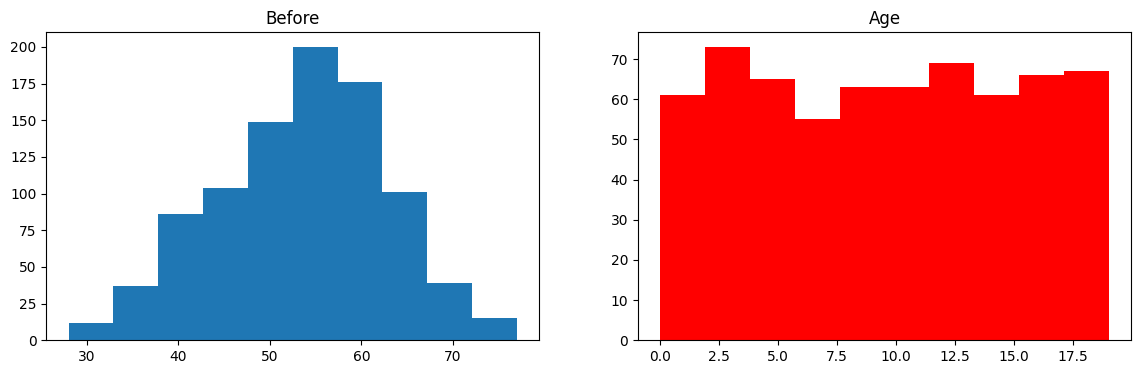

In [85]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
    ])
    # Power Transformer 
    pt = PowerTransformer()
    X_train_transformed = pt.fit_transform(X_train)
    X_test_transformed = pt.fit_transform(X_test)


    X_train_trf1 = trf.fit_transform(X_train_transformed)
    X_test_trf1 = trf.fit_transform(X_test_transformed)
    
    # Decession Tree 
    clf = DecisionTreeClassifier()
    clf.fit(X_train_trf1,y_train)
    y_pred = clf.predict(X_test_trf1)

    # Accuracy Score
    print(accuracy_score(y_test,y_pred))
    # X_trf = trf.fit_transform(X)

    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_train_trf[:,0],color='red')
    plt.title("Age")

    plt.show()
discretize(50,'uniform')

Lets Train All Models After Discretization.

In [86]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train_trf, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test_trf)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for Naive Bayes is  0.57
Accuracy_score for KNeighborsClassifier is  0.59
Accuracy_score for LogicRegression is  0.60
Accuracy_score for SVC is  0.61
Accuracy_score for AdaBoostClassifier is  0.64
Accuracy_score for DesicionTreeClassifier is  0.64
Accuracy_score for RandomForestClassifier is  0.67
Accuracy_score for GradientBoostingClassifier is  0.67
Accuracy_score for XGBClassifier is  0.68


F1_Score for Naive Bayes is  0.39
F1_Score for KNeighborsClassifier is  0.36
F1_Score for LogicRegression is  0.40
F1_Score for SVC is  0.39
F1_Score for AdaBoostClassifier is  0.41
F1_Score for DesicionTreeClassifier is  0.40
F1_Score for RandomForestClassifier is  0.46
F1_Score for GradientBoostingClassifier is  0.42
F1_Score for XGBClassifier is  0.50


Precision for Naive Bayes is  0.40
Precision for KNeighborsClassifier is  0.37
Precision for LogicRegression is  0.40
Precision for SVC is  0.39
Precision for AdaBoostClassifier is  0.41
Precision for DesicionTreeClassifier is  

After Discretization There is No Improvement in Accuracy . Lets Move Toward Over Next Method

---

#### Feautre Extraction . 
Now I Use Feature Extraction Techniques to Improve Models Performance .

In [259]:
# Load Data Again Which is Cleaned From Outlier and Missing Values Are Imputed , No Duplicated .
data = pd.read_csv('heart_disease_cleaned.csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,Female,VA Long Beach,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,flat,0.0,normal,1
915,917,62,Male,VA Long Beach,typical angina,143.06,139.0,False,st-t abnormality,119.94,True,2.042,flat,0.0,reversable defect,0
916,918,55,Male,VA Long Beach,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
917,919,58,Male,VA Long Beach,asymptomatic,150.81,385.0,True,lv hypertrophy,110.63,True,2.181,flat,0.0,reversable defect,0


- Renaming ColumnNames and Droping Some Irrelevant Column
- Here we Drop some irrelevant columns Like : `id ,restecg` and Uses those columns Which are Important . 
- in Thal and cp we have space which i think will create problem later on so we also remove those spaces . 
- in target Column 0 : 'No disease' and 1 : 'Effected Disease' . Here in target Column , i do some changes , before there are 5 different categories . 1,2,3,4, Represent Disease , soo i make a new column  in which , there are only two categories one represents Disease and one represents no disease . 
data_1['target'] = ((data['num'] > 0)*1).copy()


[ (data['sex'] == 'Male')*1 ]: The boolean values (True/False) are then multiplied by 1. In Python, True is equivalent to 1 and False is equivalent to 0 when used in arithmetic operations. This operation effectively converts the boolean values into numerical values (1 for 'Male' and 0 for 'Female').

In [151]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = data[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((data['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (data['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (data['fbs'])*1
data_1['exang'] = (data['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
# Load Data Sample 
data_1.sample(15)

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
652,56,1,non-anginal,Switzerland,120.0,0.0,0,97.0,0,0.0,flat,0.0,reversable_defect,0
676,60,1,asymptomatic,Switzerland,130.0,0.0,0,130.0,1,1.1,downsloping,1.0,reversable_defect,1
209,62,0,asymptomatic,Cleveland,150.0,244.0,0,154.0,1,1.4,flat,0.0,normal,1
837,59,1,asymptomatic,VA Long Beach,125.0,222.0,0,135.0,1,2.5,downsloping,1.0,fixed_defect,1
545,54,1,asymptomatic,Hungary,130.0,242.0,0,91.0,1,1.0,flat,1.0,reversable_defect,1
794,75,1,asymptomatic,VA Long Beach,170.0,203.0,1,108.0,0,0.0,flat,0.0,reversable_defect,1
825,50,1,asymptomatic,VA Long Beach,144.0,349.0,0,120.0,1,1.0,upsloping,0.0,reversable_defect,1
136,70,1,asymptomatic,Cleveland,145.0,174.0,0,125.0,1,2.6,downsloping,0.0,reversable_defect,1
358,42,1,atypical_angina,Hungary,150.0,268.0,0,136.0,0,0.0,upsloping,0.0,normal,0
663,57,1,asymptomatic,Switzerland,140.0,0.0,0,100.0,1,0.0,flat,2.0,fixed_defect,1


- Encoding Data By Usinf pd.get_dummies 

The pd.get_dummies function in pandas automatically identifies and encodes categorical variables while leaving numerical variables unchanged.

In [253]:
data = pd.get_dummies(data_1, drop_first=False)
data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,country_Cleveland,country_Hungary,country_Switzerland,country_VA Long Beach,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
0,63,1,145.00,233.0,1,150.00,0,2.300,0.0,0,...,True,False,False,False,True,False,False,True,False,False
1,67,1,160.00,286.0,0,108.00,1,1.500,3.0,1,...,True,False,False,False,False,True,False,False,True,False
2,67,1,120.00,229.0,0,129.00,1,2.600,2.0,1,...,True,False,False,False,False,True,False,False,False,True
3,37,1,130.00,250.0,0,187.00,0,3.500,0.0,0,...,True,False,False,False,True,False,False,False,True,False
4,41,0,130.00,204.0,0,172.00,0,1.400,0.0,0,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,0,127.00,333.0,1,154.00,0,0.000,0.0,1,...,False,False,False,True,False,True,False,False,True,False
915,62,1,143.06,139.0,0,119.94,1,2.042,0.0,0,...,False,False,False,True,False,True,False,False,False,True
916,55,1,122.00,223.0,1,100.00,0,0.000,1.0,1,...,False,False,False,True,False,True,False,True,False,False
917,58,1,150.81,385.0,1,110.63,1,2.181,0.0,0,...,False,False,False,True,False,True,False,False,False,True


- Train Test Split 

In [153]:
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (735, 23)
Shape of y_train: (735,)
Shape of X_test: (184, 23)
Shape of y_test: (184,)


- Scaling Data

-- Min Max 

In [154]:
# MinMax Scaler 
scaler = MinMaxScaler()
# Numeric Columns 
num = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
# Using Looop Apply 
for col in num : 
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

-- Standard 

In [155]:
# # MinMax Scaler 
# scaler = StandardScaler()
# # Numeric Columns 
# num = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
# # Using Looop Apply 
# for col in num : 
#     X_train[col] = scaler.fit_transform(X_train[[col]])
#     X_test[col] = scaler.transform(X_test[[col]])

- Normalization 

-- Quantile Transformation

In [156]:
# # Quantile  
# qt = QuantileTransformer(output_distribution='normal',random_state=42)
# # Numeric Columns 
# num = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
# # Using Looop Apply 
# for col in num : 
#     X_train[col] = qt.fit_transform(X_train[[col]])
#     X_test[col] = qt.transform(X_test[[col]])

-- Power Transformer

In [157]:
# # Power  
# pt = PowerTransformer()
# # Numeric Columns 
# num = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
# # Using Looop Apply 
# for col in num : 
#     X_train[col] = pt.fit_transform(X_train[[col]])
#     X_test[col] = pt.transform(X_test[[col]])

---
Selecting Best Model Using Hyperparameter Tuning --------------------------------

In [158]:
%%time
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          'Naive Bayes' : (GaussianNB(),{})
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")


Accuracy_score for LogicRegression is  0.82
Accuracy_score for SVC is  0.83
Accuracy_score for DesicionTreeClassifier is  0.83
Accuracy_score for Naive Bayes is  0.84
Accuracy_score for AdaBoostClassifier is  0.84
Accuracy_score for RandomForestClassifier is  0.85
Accuracy_score for XGBClassifier is  0.85
Accuracy_score for GradientBoostingClassifier is  0.86
Accuracy_score for KNeighborsClassifier is  0.87


F1_Score for LogicRegression is  0.82
F1_Score for SVC is  0.83
F1_Score for DesicionTreeClassifier is  0.83
F1_Score for Naive Bayes is  0.83
F1_Score for AdaBoostClassifier is  0.84
F1_Score for RandomForestClassifier is  0.84
F1_Score for XGBClassifier is  0.84
F1_Score for GradientBoostingClassifier is  0.86
F1_Score for KNeighborsClassifier is  0.87


Precision for LogicRegression is  0.82
Precision for SVC is  0.83
Precision for DesicionTreeClassifier is  0.83
Precision for Naive Bayes is  0.84
Precision for AdaBoostClassifier is  0.84
Precision for RandomForestClassifier is

In [161]:
# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
print(f'Best Parameters: {best_Accuracy_model[4]}')

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
print(f'Best Parameters: {best_f1_model[4]}')


# Selecting the best model based on MSE 
best_Precision_model = max(model_scores, key=lambda x: x[3])
print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
print(f'Best Parameters: {best_Precision_model[4]}')

Best Parameters for LogicRegression is {}
Best Parameters for SVC is {'kernel': 'rbf'}
Best Parameters for DesicionTreeClassifier is {'max_depth': 5, 'random_state': 42}
Best Parameters for Naive Bayes is {}
Best Parameters for AdaBoostClassifier is {'n_estimators': 10, 'random_state': 42}
Best Parameters for RandomForestClassifier is {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
Best Parameters for XGBClassifier is {'n_estimators': 10}
Best Parameters for GradientBoostingClassifier is {'n_estimators': 100, 'random_state': 42}
Best Parameters for KNeighborsClassifier is {'n_neighbors': 9}


Best model based on Accuracy is KNeighborsClassifier with Accuracy of 0.87
Best Parameters: {'n_neighbors': 9}
Best model based on F1_Score is KNeighborsClassifier with F1_Score of 0.87
Best Parameters: {'n_neighbors': 9}
Best model based on Precision is KNeighborsClassifier with Precision of 0.87
Best Parameters: {'n_neighbors': 9}


Atleast Features Selection Technique Help alot in Improving Models Accuracy . This Time Our Model Accuracy is `0.87` Which is Better Than All Other Methods Which i Perform Above . 

1. Results When Scaling method is MinMax: 
- Best model based on Accuracy is KNeighborsClassifier with Accuracy of 0.87
  
  Best Parameters: {'n_neighbors': 9}
- Best model based on F1_Score is KNeighborsClassifier with F1_Score of 0.87
  
  Best Parameters: {'n_neighbors': 9}
- Best model based on Precision is KNeighborsClassifier with Precision of 0.87
  
  Best Parameters: {'n_neighbors': 9}
 -------------------------------------------------------- 
2. Results When Scaling method is Standard Scaler:

- Best model based on Accuracy is GradientBoostingClassifier with Accuracy of 0.86
  
  Best Parameters: {'n_estimators': 100, 'random_state': 42}
- Best model based on F1_Score is GradientBoostingClassifier with F1_Score of 0.86
  
  Best Parameters: {'n_estimators': 100, 'random_state': 42}
- Best model based on Precision is GradientBoostingClassifier with Precision of 0.86
  
  Best Parameters: {'n_estimators': 100, 'random_state': 42}


- Inverse Encoding 

In [254]:
# Extracting the original categorical columns
original_categorical_cols = data_1[['chest_pain_type','st_slope_type','thalassemia_type','country']]
# Reverting one-hot encoding by finding the column with the maximum value in each row
inverse_encoded_categorical = original_categorical_cols.idxmax(axis=1)
# Adding the original categorical columns back
data_inverse = pd.concat([data_1, inverse_encoded_categorical], axis=1)
data_inverse = data_inverse[['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']]
data_inverse

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,Cleveland,145.00,233.0,1,150.00,0,2.300,downsloping,0.0,fixed_defect,0
1,67,1,asymptomatic,Cleveland,160.00,286.0,0,108.00,1,1.500,flat,3.0,normal,1
2,67,1,asymptomatic,Cleveland,120.00,229.0,0,129.00,1,2.600,flat,2.0,reversable_defect,1
3,37,1,non-anginal,Cleveland,130.00,250.0,0,187.00,0,3.500,downsloping,0.0,normal,0
4,41,0,atypical_angina,Cleveland,130.00,204.0,0,172.00,0,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,0,asymptomatic,VA Long Beach,127.00,333.0,1,154.00,0,0.000,flat,0.0,normal,1
915,62,1,typical_angina,VA Long Beach,143.06,139.0,0,119.94,1,2.042,flat,0.0,reversable_defect,0
916,55,1,asymptomatic,VA Long Beach,122.00,223.0,1,100.00,0,0.000,flat,1.0,fixed_defect,1
917,58,1,asymptomatic,VA Long Beach,150.81,385.0,1,110.63,1,2.181,flat,0.0,reversable_defect,0


---

#### Last Step : Making a Function to train different models using Hyperparameter Tuning , in the end Printing out the Best Model Based on Evaluations Metrices . We provide only data and target variable . the function give us Output 

In [10]:
# Wrtie a Function for Traning a model by Giving Target and data 
def train_model(data,target):
    
    # Encode Data First Using Label Encoder 
    # Columns to encode
    categorical_cols = [col
                        for col in data.columns
                        if data[col].dtype in ['category', 'object']]
    columns_to_encode = categorical_cols

    # Dictionary to store LabelEncoders for each column
    label_encoders = {}

    # Loop to apply LabelEncoder to each column
    for col in columns_to_encode:
    # Create a new LabelEncoder for the column
        le = LabelEncoder()
    # Fit and transform the data
        data[col] = le.fit_transform(data[col])
    # Store the encoder in the dictionary
        label_encoders[col] = le

    # X and y 
    X = data.drop(target,axis=1)
    y = data[target]
    

    
    # Scale Data 
    scaler = MinMaxScaler()
    for col in X.columns:
        if X[col].dtype != 'object' :
            X[col] = scaler.fit_transform(X[[col]])

    # Train Test Split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    
    # HyperParameters 
    # # Create a dictionaries of list of models to evaluate performance with hyperparameters
    models = { 
            'LogicRegression' : (LogisticRegression(), {}),
            'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
            'DesicionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
            'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
            'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
            'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
            'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),  
            'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
            'Naive Bayes' : (GaussianNB(),{})
            }

    # train and predict each model with evaluation metrics as well making a for loop to iterate over the models
    model_scores = []
    for name, (model, params) in models.items():
        # create a pipline
        pipeline =GridSearchCV(model, params, cv=5)
        
        # fit the pipeline
        pipeline.fit(X_train, y_train)
        
        # make prediction from each model
        y_pred = pipeline.predict(X_test)
        # Metric
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,average='macro')
        precision = precision_score(y_test, y_pred,average='macro')
        best_parameter = pipeline.best_params_
        # Append these in the model_scores
        model_scores.append((name,accuracy , f1 , precision,best_parameter))                                    
    


    # selecting the best model from all above models with evaluation metrics sorting method
    sorted_models = sorted(model_scores, key=lambda x: x[1])

    # Printing Each model with evaluation metrics
    for model in sorted_models:
        print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
    print('\n')
    for model in sorted_models:
        print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
    print('\n')
    for model in sorted_models:
        print('Precision for', f"{model[0]} is {model[3]: .2f}")
    print('\n')
    # Best Parameter for each model
    for model in sorted_models:
        print('Best Parameters for', f"{model[0]} is {model[4]}")
    print('\n')
    # Selecting the best model based on MAE
    best_Accuracy_model = max(model_scores, key=lambda x: x[1])
    print('Best model based on Accuracy is', f"{best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")
    print(f'Best Parameters: {best_Accuracy_model[4]}')

    # Selecting the best model based on R2
    best_f1_model = max(model_scores, key=lambda x: x[2])
    print('Best model based on F1_Score is', f"{best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")
    print(f'Best Parameters: {best_f1_model[4]}')


    # Selecting the best model based on MSE 
    best_Precision_model = max(model_scores, key=lambda x: x[3])
    print('Best model based on Precision is', f"{best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")
    print(f'Best Parameters: {best_Precision_model[4]}')
    
    # Visuzalize the  Model Accuracy By Using Plot Histogram
    plt.figure(figsize=(10, 5))
    sns.barplot(y=[model[0] for model in sorted_models], x=[model[1] for model in sorted_models])   
    plt.title('Model Accuracy')
    plt.show()
    
    # Inver transform at the End 
    
    # Loop through each column to decode the data
    for col, le in label_encoders.items():
    # Use the inverse_transform method to decode the column
        data[col] = le.inverse_transform(data[[col]])

In [11]:
 # Load Cleaned Data Again
cleaned_data = pd.read_csv('heart_disease_cleaned.csv')

An extra step to simplify your target column, which initially had five categories. Now, you're converting it into a binary format, where 0 represents the absence of disease and 1 represents the presence of disease. This transformation helps streamline the target variable into a binary classification problem for easier analysis or modeling.

In [12]:
cleaned_data['num'] = ((cleaned_data['num'] > 0)*1)

In [13]:
# For Checking Missing Values , Duplicates 
print(f'Missing Values in Dataset is : {cleaned_data.isnull().sum().sum()}')
print(f'Duplicated Values in Dataset is : {cleaned_data.duplicated().any()}')

Missing Values in Dataset is : 0
Duplicated Values in Dataset is : False


So Our Data is Clean Let Apply FUnction and Check Accuracy 

Accuracy_score for KNeighborsClassifier is  0.82
Accuracy_score for SVC is  0.83
Accuracy_score for Naive Bayes is  0.83
Accuracy_score for LogicRegression is  0.84
Accuracy_score for DesicionTreeClassifier is  0.88
Accuracy_score for GradientBoostingClassifier is  0.88
Accuracy_score for AdaBoostClassifier is  0.88
Accuracy_score for RandomForestClassifier is  0.89
Accuracy_score for XGBClassifier is  0.90


F1_Score for KNeighborsClassifier is  0.81
F1_Score for SVC is  0.83
F1_Score for Naive Bayes is  0.83
F1_Score for LogicRegression is  0.84
F1_Score for DesicionTreeClassifier is  0.88
F1_Score for GradientBoostingClassifier is  0.88
F1_Score for AdaBoostClassifier is  0.88
F1_Score for RandomForestClassifier is  0.89
F1_Score for XGBClassifier is  0.90


Precision for KNeighborsClassifier is  0.81
Precision for SVC is  0.83
Precision for Naive Bayes is  0.83
Precision for LogicRegression is  0.84
Precision for DesicionTreeClassifier is  0.89
Precision for GradientBoostingClassif

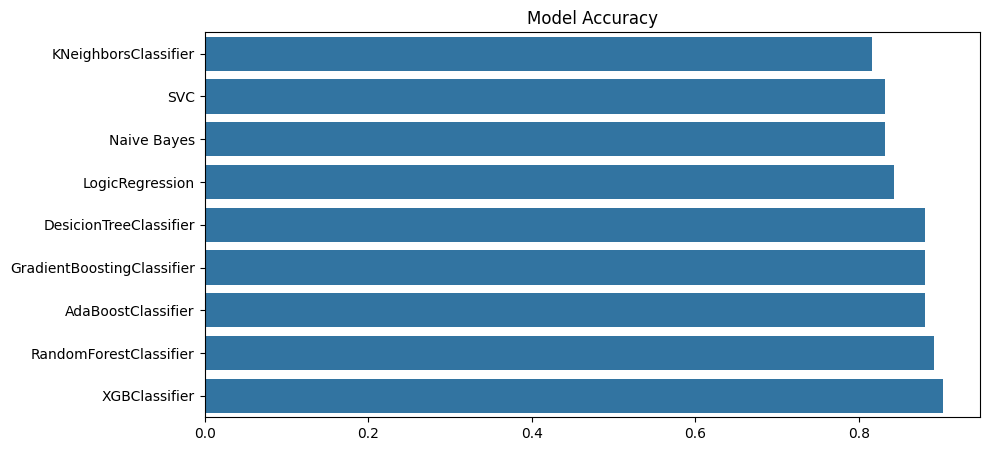

In [14]:
train_model(cleaned_data,'num')

Coclusion : 
We try different methods like `Scaling , Normalization , PCA , Discritization ` , Train Model One by One to Improve accuracy of the models . All The Methods Perform Well but the Accuracy Change is normal . Then we do Feature Extraction , and the Model Performance is boosted  and Accuracy is increased . The Best Model According to my notebook , and methods i used is :
- Best model based on Accuracy is XGBClassifier with Accuracy of 0.90
  Best Parameters: {'n_estimators': 100}
- Best model based on F1_Score is XGBClassifier with F1_Score of 0.90
  Best Parameters: {'n_estimators': 100}
- Best model based on Precision is XGBClassifier with Precision of 0.91
  Best Parameters: {'n_estimators': 100}